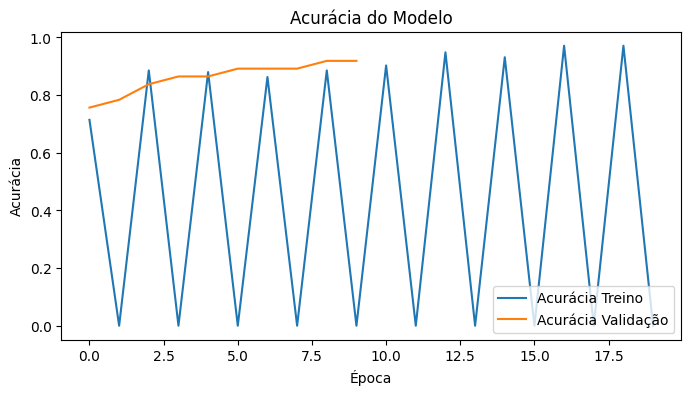

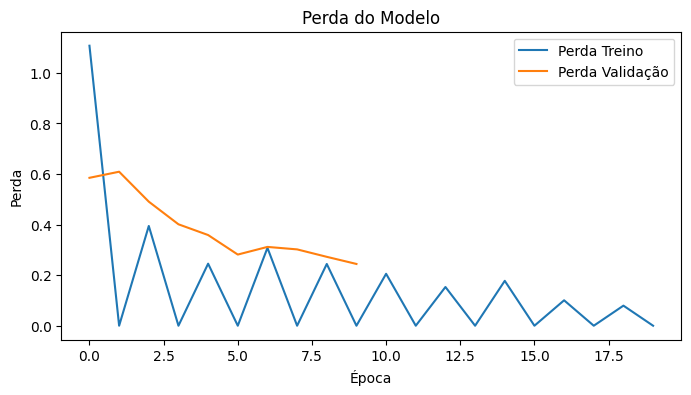

In [4]:
import matplotlib.pyplot as plt
import pickle


with open('models/history_phase2.pkl', 'rb') as f:
    history_dict = pickle.load(f)

def plot_training_history(history):
    plt.figure(figsize=(8, 4))
    plt.plot(history['accuracy'], label='Acurácia Treino')
    plt.plot(history['val_accuracy'], label='Acurácia Validação')
    plt.title('Acurácia do Modelo')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend(loc='lower right')
    plt.show()
    
    plt.figure(figsize=(8, 4))
    plt.plot(history['loss'], label='Perda Treino')
    plt.plot(history['val_loss'], label='Perda Validação')
    plt.title('Perda do Modelo')
    plt.xlabel('Época')
    plt.ylabel('Perda')
    plt.legend(loc='upper right')
    plt.show()

plot_training_history(history_dict)


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = tf.keras.models.load_model('models/modelo_brain_tumor_improved.keras')


test_dir = 'split_dataset/test'
img_width, img_height = 224, 224
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_generator.reset()


Found 40 images belonging to 2 classes.


c:\Users\55119\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 939ms/step


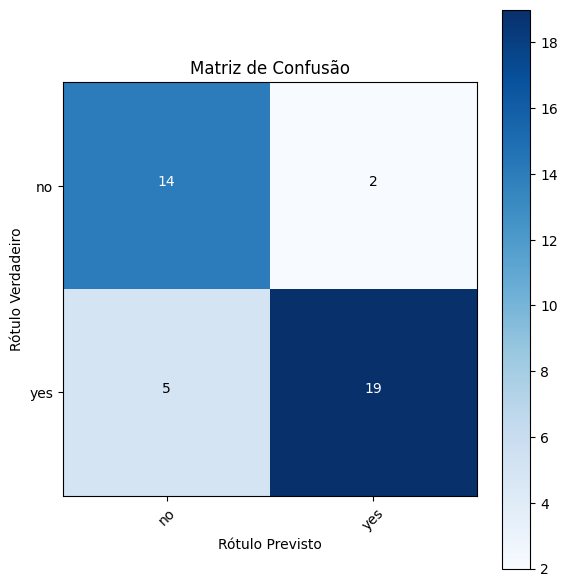

Relatório de Classificação:

              precision    recall  f1-score   support

          no       0.74      0.88      0.80        16
         yes       0.90      0.79      0.84        24

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.84      0.82      0.83        40



In [6]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, classification_report


predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_labels = (predictions > 0.5).astype(int).flatten()
true_labels = test_generator.classes


cm = confusion_matrix(true_labels, predicted_labels)

def plot_confusion_matrix(cm, classes, title='Matriz de Confusão', cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Rótulo Verdadeiro')
    plt.xlabel('Rótulo Previsto')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, classes=['no', 'yes'])


report = classification_report(true_labels, predicted_labels, target_names=['no', 'yes'])
print("Relatório de Classificação:\n")
print(report)
